In [0]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import sklearn.cluster as skCluster
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA as RandomizedPCA
from sklearn.cluster import KMeans
from scipy.cluster.vq import kmeans
from scipy.spatial.distance import cdist,pdist
from matplotlib import cm
from sklearn.cluster import KMeans
import numpy as np
from scipy.cluster.vq import kmeans
from scipy.spatial.distance import cdist,pdist
from sklearn import datasets
from sklearn.decomposition import RandomizedPCA
from matplotlib import pyplot as plt
from matplotlib import cm


In [0]:
def normData(X):
    X_norm = (X - X.min())/(X.max() - X.min())
    return X_norm
def pca(X_norm):
    pca = RandomizedPCA(n_components=3).fit(X_norm) #3-dimensional PCA
    transformed = pca.transform(X_norm)
    return transformed
def clusterTest(Y,number):
    ##### cluster data into K=1..number clusters #####
    from sklearn.cluster import KMeans
    Ks = range(1, number)
    km = [KMeans(n_clusters=i) for i in Ks]
    score = [(km[i].fit(Y).score(Y)) for i in range(len(km))]

    fig = plt.figure()
    fig = plt.figure(figsize=(15,15))
    ax = fig.add_subplot(111)
    plt.grid(True)
    plt.plot(Ks, score,'b*-')
    plt.xlabel('Number of clusters')
    plt.ylabel('Percentage of variance explained (%)')
    plt.title('Sessions: Elbow for KMeans clustering')
    plt.xticks()
    plt.show()
    return score


def clusters(Y, number, s):
    KM = KMeans(n_clusters=number).fit(Y)
    for i in range(0, Y.shape[0]):
        if KM.labels_[i] == 0:
            c1 = plt.scatter(Y[i,0],Y[i,1],c='r',marker='+')
        elif KM.labels_[i] == 1:
            c2 = plt.scatter(Y[i,0],Y[i,1],c='g', marker='o')
        elif KM.labels_[i] == 2:
            c3 = plt.scatter(Y[i,0],Y[i,1],c='b', marker='*')
        elif KM.labels_[i] == 3:
            c4 = plt.scatter(Y[i,0],Y[i,1],c='y', marker='^')
        elif KM.labels_[i] == 4:
            c5 = plt.scatter(Y[i,0],Y[i,1],c='c', marker='<')
    plt.savefig(str(s) +'.tiff')
    plt.show()
    h = pd.DataFrame(KM.labels_,columns=['label']) 
    return h,KM.labels_
    

In [3]:
import urllib.request
#df = pd.read_excel('./Data/FIFA18Ratings.xlsx')
link = 'https://docs.google.com/spreadsheets/d/1dzntAKEV9NF4IfSV7om0YQQaONXALjtA4xMPW76qaDg/export?format=csv'
with urllib.request.urlopen(link) as file:
  df = pd.read_csv(file)
df.head()

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (38) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Name Country of Origin Date of Birth Height Weight  \
0                  Lionel Messi         Argentina     6/24/1987  170cm   72kg   
1  C. Ronaldo dos Santos Aveiro          Portugal      2/5/1985  187cm   83kg   
2    Neymar da Silva Santos Jr.            Brazil      2/5/1992  175cm   68kg   
3                   Luis Suárez           Uruguay     1/24/1987  182cm   86kg   
4                  Manuel Neuer           Germany     3/27/1986  193cm   92kg   

   Age  Overall Rating  Potential         Current Team Club Position  \
0   30              94         94         FC Barcelona            RS   
1   32              94         94       Real Madrid CF            LW   
2   25              92         93  Paris Saint-Germain            LW   
3   30              92         92         FC Barcelona            LS   
4   31              92         92     FC Bayern Munich           SUB   

                ...                GK Handling GK Kicking  GK Positioning  \
0               ...                         11         15              14   
1               ...                         11         15              14   
2               ...                          9         15              15   
3               ...                         25         31              33   
4               ...                         90         95              91   

   GK Reflexes  Weak Foot Rating  Skill Moves  Jersey #  Date Joined Club  \
0            8               4.0          4.0      10.0          7/1/2004   
1           11               4.0          5.0       7.0          7/1/2009   
2           11               5.0          5.0      10.0          8/3/2017   
3           37               4.0          4.0       9.0         7/11/2014   
4           89               4.0          1.0       1.0          7/1/2011   

                                              Traits  \
0  ['Finesse Shot', 'Long Shot Taker', 'Speed Dri...   
1  ['Power Free Kick', 'Diver', 'Flair', 'Long Sh...   
2  ['Diver', 'Flair', 'Speed Dribbler', 'Technica...   
3  ['Diver', 'Tries To Beat Defensive Line', 'Out...   
4  ['GK Long Throw', 'GK 1-on-1 rush', 'GK Rushes...   

                              Link  
0  http://sofifa.com/player/158023  
1   http://sofifa.com/player/20801  
2  http://sofifa.com/player/190871  
3  http://sofifa.com/player/176580  
4  http://sofifa.com/player/167495  

[5 rows x 53 columns]

In [0]:
tactical = ['Crossing', 'Short Passing', 'Dribbling','Long Passing',
        'Interceptions', 'Marking', 'Weak Foot Rating', 'Skill Moves',
        'Vision']


In [0]:
for i in tactical:
    df[i] = pd.to_numeric(df[i], errors='coerce')

In [0]:
tactical = ['Name','Crossing', 'Short Passing', 'Dribbling','Long Passing',
        'Interceptions', 'Marking', 'Weak Foot Rating', 'Skill Moves',
        'Vision']

In [26]:
tacticalDf = df[tactical].dropna()

Crossing  Short Passing  Dribbling  Long Passing  Interceptions  \
0            77             88       97.0          87.0           22.0   
1            85             83       91.0          77.0           29.0   
2            75             82       96.0          75.0           36.0   
3            77             83       86.0          64.0           41.0   
4            15             55       30.0          59.0           30.0   
5            17             50       18.0          51.0           30.0   
6            92             91       86.0          87.0           60.0   
7            62             85       85.0          65.0           39.0   
8            81             89       94.0          83.0           41.0   
9            85             90       79.0          93.0           81.0   
10           64             82       68.0          85.0           92.0   
11           68             75       84.0          59.0           20.0   
12           66             78       61.0          72.0           90.0   
13           82             87       92.0          75.0           32.0   
14           13             29       12.0          26.0           19.0   
15           14             33       13.0          35.0           15.0   
16           78             92       86.0          84.0           78.0   
17           83             92       87.0          81.0           46.0   
18           70             81       89.0          63.0           24.0   
19           58             59       58.0          59.0           88.0   
20           13             37       26.0          35.0           28.0   
21           68             85       79.0          81.0           91.0   
22           75             79       80.0          80.0           35.0   
23           80             87       87.0          88.0           70.0   
24           82             81       87.0          75.0           35.0   
25           87             90       84.0          86.0           56.0   
26           72             91       90.0          90.0           78.0   
27           81             79       90.0          73.0           50.0   
28           55             79       53.0          70.0           88.0   
29           70             78       80.0          50.0           48.0   
...         ...            ...        ...           ...            ...   
17884        25             42       41.0          28.0           18.0   
17886        33             45       45.0          34.0           15.0   
17887        36             55       49.0          40.0           42.0   
17888        49             54       46.0          52.0           46.0   
17889        53             49       48.0          47.0           34.0   
17890        47             46       46.0          42.0           24.0   
17891        37             55       49.0          52.0           40.0   
17892        39             55       55.0          56.0           26.0   
17893        39             46       45.0          54.0           46.0   
17894        10             27       10.0          26.0           10.0   
17895        29             43       49.0          34.0           19.0   
17897        33             42       38.0          40.0           52.0   
17898        45             59       49.0          54.0           25.0   
17899        40             55       46.0          53.0           40.0   
17900        31             38       43.0          23.0           20.0   
17901        32             55       40.0          54.0           42.0   
17902        41             53       56.0          58.0           22.0   
17903        45             30       49.0          26.0           46.0   
17904        39             52       50.0          53.0           42.0   
17905        14             28       10.0          31.0           13.0   
17906        31             58       48.0          50.0           38.0   
17908        11             28       10.0          21.0           13.0   
17909      

In [0]:
normTacticalDf = normData(tacticalDf[tactical[1:]])

In [8]:
pcaTacticalDf = pca(normTacticalDf)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class RandomizedPCA is deprecated; RandomizedPCA was deprecated in 0.18 and will be removed in 0.20. Use PCA(svd_solver='randomized') instead. The new implementation DOES NOT store whiten ``components_``. Apply transform to get them.
  warnings.warn(msg, category=DeprecationWarning)


15807

In [9]:
clusterTest(pcaTacticalDf, 30)

[-4928.27829116085,
 -2934.0796884985057,
 -1826.73772879233,
 -1334.8110835851787,
 -1086.1601698783393,
 -941.866046042281,
 -863.9039760540882,
 -796.0741555552095,
 -737.7088703558036,
 -692.8273747107692,
 -654.6990348560531,
 -613.8011146837515,
 -586.0549160544292,
 -552.6112782613727,
 -521.6955213512272,
 -497.9712012095777,
 -474.02537008829955,
 -456.6066259365357,
 -436.419787899304,
 -418.92267854621764,
 -404.6161444852248,
 -391.8068536121835,
 -376.3592899124863,
 -363.7883370569879,
 -352.90418753731666,
 -343.5600374866156,
 -334.0997683302319,
 -324.1354292276925,
 -315.53467768795133]

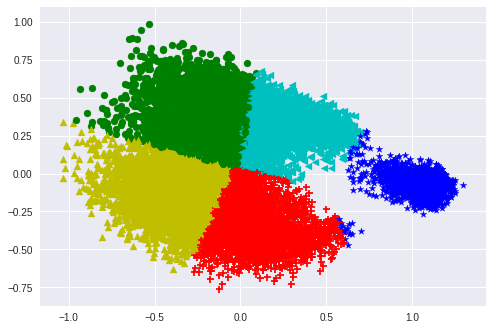

In [30]:
h, labels = clusters(pcaTacticalDf, 5,'TacticalClusterPlot')


In [0]:
tacticalDf['Cluster'] = labels

In [32]:
tacticalDf

Name  Crossing  Short Passing  Dribbling  \
0                      Lionel Messi        77             88       97.0   
1      C. Ronaldo dos Santos Aveiro        85             83       91.0   
2        Neymar da Silva Santos Jr.        75             82       96.0   
3                       Luis Suárez        77             83       86.0   
4                      Manuel Neuer        15             55       30.0   
5             David De Gea Quintana        17             50       18.0   
6                   Kevin De Bruyne        92             91       86.0   
7                Robert Lewandowski        62             85       85.0   
8                       Eden Hazard        81             89       94.0   
9                        Toni Kroos        85             90       79.0   
10                     Mats Hummels        64             82       68.0   
11                  Gonzalo Higuaín        68             75       84.0   
12              Sergio Ramos García        66             78       61.0   
13                     Paulo Dybala        82             87       92.0   
14                        Jan Oblak        13             29       12.0   
15                 Thibaut Courtois        14             33       13.0   
16                      Luka Modrić        78             92       86.0   
17        David Josué Jiménez Silva        83             92       87.0   
18                    Sergio Agüero        70             81       89.0   
19                Giorgio Chiellini        58             59       58.0   
20                 Gianluigi Buffon        13             37       26.0   
21                     N'Golo Kanté        68             85       79.0   
22                       Harry Kane        75             79       80.0   
23                       Paul Pogba        80             87       87.0   
24                Antoine Griezmann        82             81       87.0   
25                Christian Eriksen        87             90       84.0   
26                 Thiago Alcântara        72             91       90.0   
27                   Alexis Sánchez        81             79       90.0   
28                      Diego Godín        55             79       53.0   
29                   Edinson Cavani        70             78       80.0   
...                             ...       ...            ...        ...   
17884                   Tom Knowles        25             42       41.0   
17886              Victor Adeboyejo        33             45       45.0   
17887               Benjamin Tannus        36             55       49.0   
17888                  Dawid Błanik        49             54       46.0   
17889                  Julian Conze        53             49       48.0   
17890                   Sean Whaler        47             46       46.0   
17891                Emil Solnørdal        37             55       49.0   
17892              Harrison Biggins        39             55       55.0   
17893                   Kevin Yakob        39             46       45.0   
17894                 James Tierney        10             27       10.0   
17895             Teruhito Nakagawa        29             43       49.0   
17897                 Yutaka Soneda        33             42       38.0   
17898                Cameron McGilp        45             59       49.0   
17899        Kristoffer Gunnarshaug        40             55       46.0   
17900     Apostolos Stamatelopoulos        31             38       43.0   
17901              Atsushi Kurokawa        32             55       40.0   
17902                 Julian Guttau        41             53       56.0   
17903                   Goson Sakai        45             30       49.0   
17904                  Carl Stewart        39             52       50.0   
17905             Michael Antkowiak        14             28       10.0   
17906              Mads Emil Madsen        31             58       48.0   
17908                    Nick Suman        11           